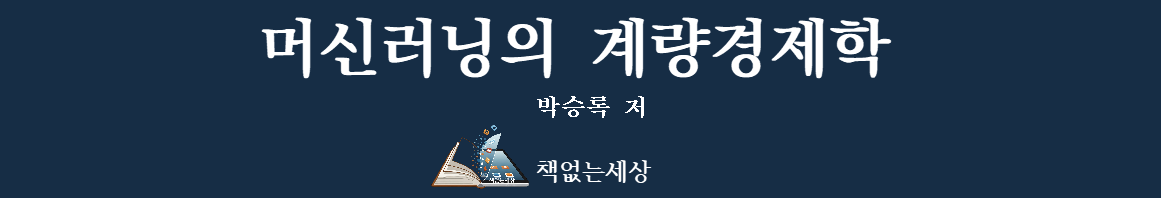

# Part 10: 딥러닝의 계량경제학

### Chapter 4. 순환 신경망(CNN)

In [1]:
# 작업공간(working directory) 지정
import os  
os.chdir("X:/Econometrics_with_ML")

# 현재 작업공간(working directory) 확인
os.getcwd() 

import warnings
warnings.filterwarnings("ignore")

### 6. 이미지 분류를 위한 예제: 손 글씨 숫자 인식

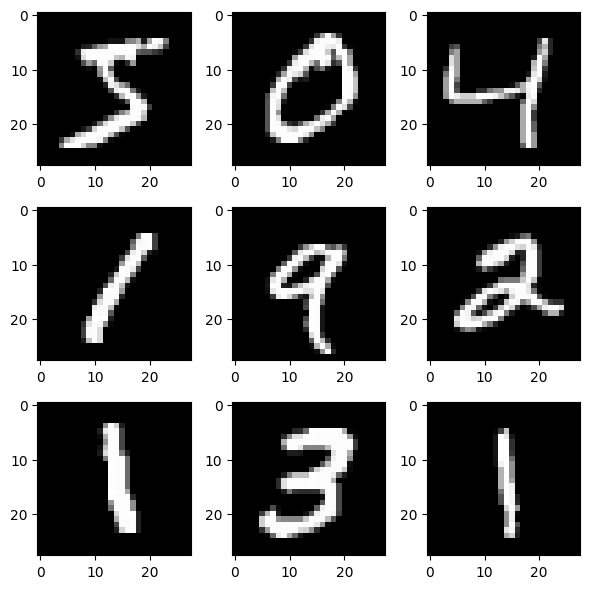

In [4]:
# =============================
# 손글씨 숫자 인식 프로젝트
# =============================

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# MNIST 데이터셋 불러오기 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 9개의 손글씨 숫자 이미지 출력 (회색조)
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()
plt.show()


In [5]:
# 간단한 CNN 모형 구축 (MNIST)

# 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 차원 변환 (샘플 개수, 너비, 높이, 채널)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# 픽셀 값을 0~1 범위로 정규화
X_train = X_train / 255
X_test = X_test / 255

# 출력값을 원-핫 인코딩으로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# 간단한 CNN 모형 정의
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # 모형 컴파일
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 모형 생성
model = baseline_model()

# 모형 학습 수행
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# 최종 평가
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN 오차율: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8556 - loss: 0.5111 - val_accuracy: 0.9756 - val_loss: 0.0832
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9753 - loss: 0.0827 - val_accuracy: 0.9838 - val_loss: 0.0506
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9836 - loss: 0.0541 - val_accuracy: 0.9849 - val_loss: 0.0447
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9862 - loss: 0.0439 - val_accuracy: 0.9878 - val_loss: 0.0365
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9892 - loss: 0.0330 - val_accuracy: 0.9881 - val_loss: 0.0343
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9866 - val_loss: 0.0365
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9926 - loss: 0.0229 - val_accuracy: 0.9881 - val_loss: 0.0374
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9932 - loss: 0.0209 - val_accu

In [6]:
# 더 큰 CNN 모형 구축 (MNIST)

# 데이터셋 불러오기 및 전처리
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# 더 큰 CNN 모형 정의
def larger_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # 모형 컴파일
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 모형 생성 및 학습 수행
model = larger_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=200)

# 최종 평가
scores = model.evaluate(X_test, y_test, verbose=0)
print("더 큰 CNN 오차율: %.2f%%" % (100-scores[1]*100))

300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7632 - loss: 0.7850 - val_accuracy: 0.9780 - val_loss: 0.0685
더 큰 CNN 오차율: 2.20%


### 7. 이미지 증강(image augmentation) 기법

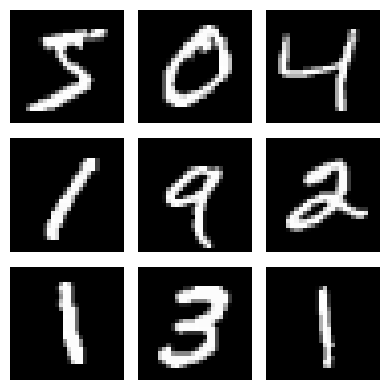

In [7]:
# 이미지 증강(Augmentation)을 통한 모형 성능 향상

# 원본 이미지 출력 (기본 비교용)
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 9개의 손글씨 숫자 이미지 출력 (회색조)
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off') 
plt.tight_layout()
plt.show()

#### 1) 특성 정규화(feature standardization)

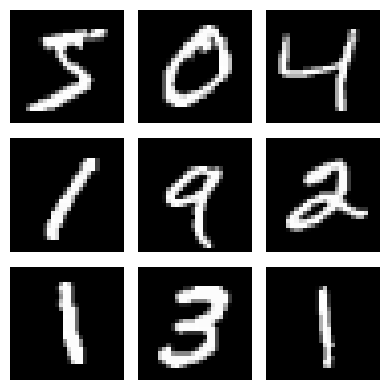

In [8]:
# 특징 표준화 (Feature Standardization): 평균=0, 표준편차=1

from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 차원 변환 (샘플 개수, 너비, 높이, 채널)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# 정수 데이터를 실수형으로 변환
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 데이터 증강을 위한 설정
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# 데이터셋의 평균과 표준편차를 이용하여 변환 적용
datagen.fit(X_train)

# 증강된 데이터 배치 하나만 가져와서 시각화
X_batch, y_batch = next(datagen.flow(X_train, y_train, batch_size=9, shuffle=False))

plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


#### 2) ZCA Whitening

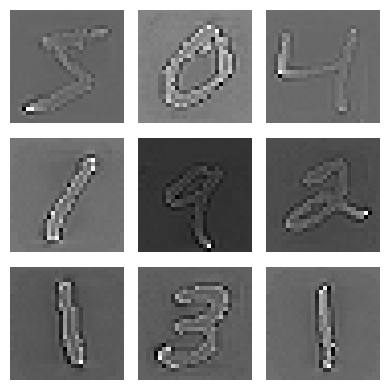

In [9]:
# 데이터 증강을 위한 설정 (ZCA Whitening 적용)
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             zca_whitening=True)

# 평균값을 기준으로 정규화 적용
X_mean = X_train.mean(axis=0)
datagen.fit(X_train - X_mean)

# 변환된 데이터셋 확인
X_centered = X_train - X_mean

# 증강된 데이터 배치 하나만 가져와서 시각화
X_batch, y_batch = next(datagen.flow(X_centered, y_train, batch_size=9, shuffle=False))

plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


#### 3) 랜덤 회전(random rotation)

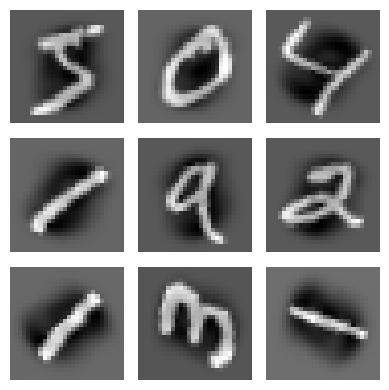

In [10]:
# 랜덤 회전 (Random Rotations): 최대 90도 회전
datagen = ImageDataGenerator(rotation_range=90)

# 증강된 데이터 배치 하나만 가져와서 시각화
X_batch, y_batch = next(datagen.flow(X_centered, y_train, batch_size=9, shuffle=False))

plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

#### 4) 랜덤 이동(random shifts)

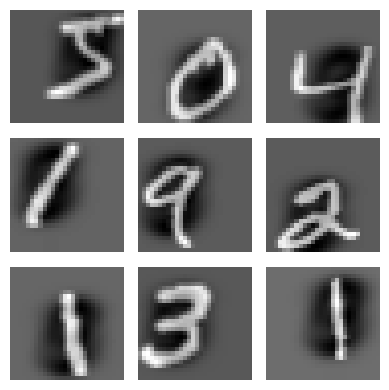

In [11]:
# 랜덤 이동 (Random Shifts): 너비 및 높이 방향으로 20% 이동
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

# 증강된 데이터 배치 하나만 가져와서 시각화
X_batch, y_batch = next(datagen.flow(X_centered, y_train, batch_size=9, shuffle=False))

plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

#### 5) 랜덤 뒤집기(random flips)

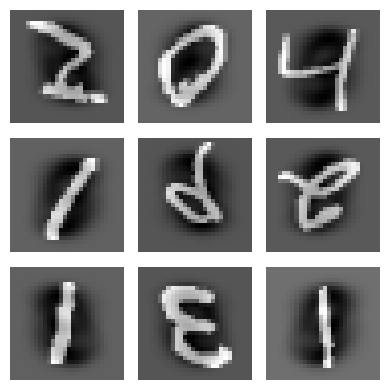

In [12]:
# 랜덤 좌우 및 상하 뒤집기 (Random Flips)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# 증강된 데이터 배치 하나만 가져와서 시각화
X_batch, y_batch = next(datagen.flow(X_centered, y_train, batch_size=9, shuffle=False))

plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

#### 6) 랜덤 확대 및 축소 (zoom)

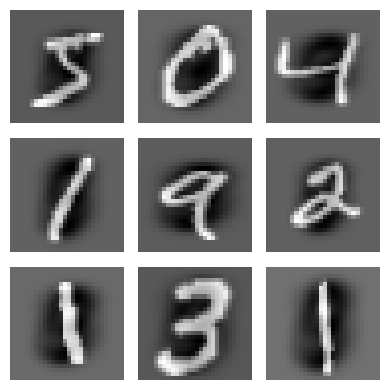

In [13]:
# 랜덤 확대 및 축소 (zoom)
datagen = ImageDataGenerator(zoom_range=0.2)

# 증강된 데이터 배치 하나만 가져와서 시각화
X_batch, y_batch = next(datagen.flow(X_centered, y_train, batch_size=9, shuffle=False))

plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

### 바. 실제 적용 예
#### 1) 증강 이미지 시각화

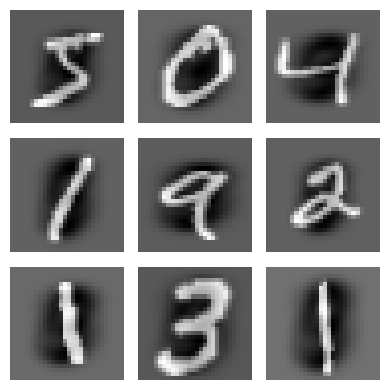

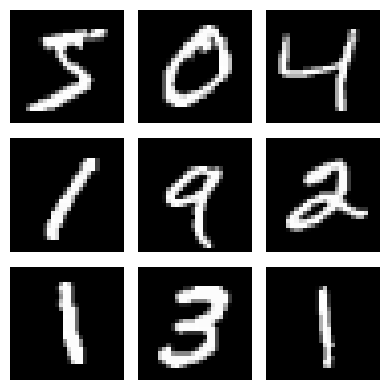

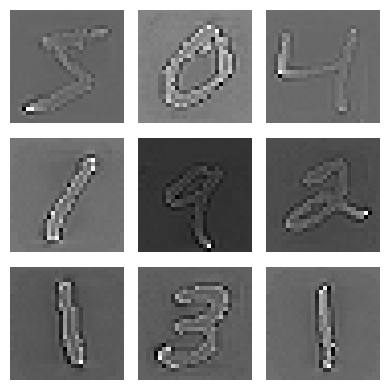

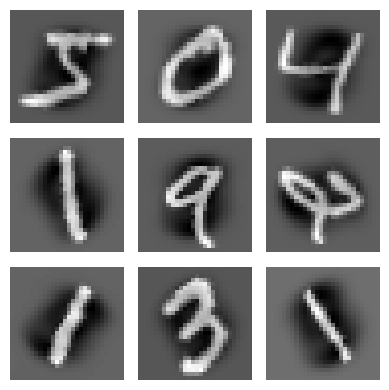

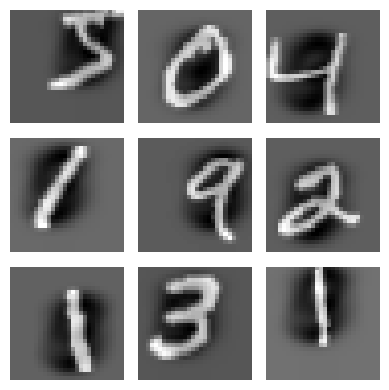

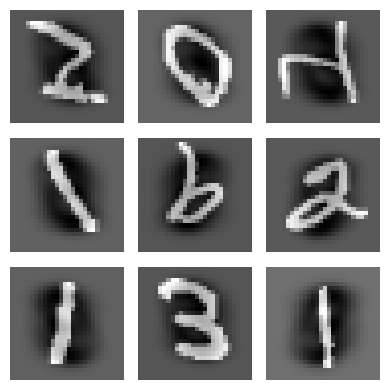

In [15]:
# 원본 이미지 출력
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 차원 변환 (샘플 개수, 너비, 높이, 채널)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# 정수 데이터를 실수형으로 변환
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 데이터세트의 평균과 표준편차를 이용하여 변환 적용
datagen = ImageDataGenerator(featurewise_center=True, 
				featurewise_std_normalization=True)
datagen.fit(X_train)

# 증강된 데이터 배치 하나만 가져와서 시각화
X_batch, y_batch = next(datagen.flow(X_train, y_train, batch_size=9, shuffle=False))
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 데이터 증강을 위한 설정 (ZCA Whitening 적용)
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             zca_whitening=True)

# 평균값을 기준으로 정규화 적용
X_mean = X_train.mean(axis=0)
datagen.fit(X_train - X_mean)

# 변환된 데이터세트 확인
X_centered = X_train - X_mean

# 증강된 데이터 배치 하나만 가져와서 시각화
X_batch, y_batch = next(datagen.flow(X_centered, y_train, batch_size=9, shuffle=False))
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 랜덤 회전 (Random Rotations): 최대 90도 회전
datagen = ImageDataGenerator(rotation_range=90)

# 증강된 데이터 배치 하나만 가져와서 시각화
X_batch, y_batch = next(datagen.flow(X_centered, y_train, batch_size=9, shuffle=False))
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 랜덤 이동 (Random Shifts): 너비 및 높이 방향으로 20% 이동
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

# 증강된 데이터 배치 하나만 가져와서 시각화
X_batch, y_batch = next(datagen.flow(X_centered, y_train, batch_size=9, shuffle=False))
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 랜덤 좌우 및 상하 뒤집기 (Random Flips)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# 증강된 데이터 배치 하나만 가져와서 시각화
X_batch, y_batch = next(datagen.flow(X_centered, y_train, batch_size=9, shuffle=False))
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

#### 2) 증강 이미지 기법을 활용한 CNN 모형

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.datasets import mnist

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 차원 변환 (샘플 개수, 너비, 높이, 채널)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# 정수 데이터를 실수형으로 변환
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 1. 데이터 증강 설정
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# 2. 데이터 준비
datagen.fit(X_train)

# 3. CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 학습 (증강된 데이터 사용)
model.fit(datagen.flow(X_train.reshape(-1, 28, 28, 1), 
                      y_train, 
                      batch_size=32),
          epochs=10,
          validation_data=(X_test.reshape(-1, 28, 28, 1), y_test))

# 6. 모형 구조 출력
model.summary()

# 7. 최종 평가
scores = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
print("CNN 오차율: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6390 - loss: 1.0487 - val_accuracy: 0.2524 - val_loss: 447.4449
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8985 - loss: 0.3178 - val_accuracy: 0.2791 - val_loss: 494.9835
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9273 - loss: 0.2288 - val_accuracy: 0.2277 - val_loss: 733.6064
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9383 - loss: 0.1964 - val_accuracy: 0.3102 - val_loss: 550.4354
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9448 - loss: 0.1779 - val_accuracy: 0.3194 - val_loss: 534.7433
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9508 - loss: 0.1584 - val_accuracy: 0.3426 - val_loss: 412.5529
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9524 - loss: 0.1510 - val_accuracy: 0.3154 - val_loss: 535.5593
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accu

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

CNN 오차율: 62.47%


### 8. 객체 탐지(Object classification)의 이해를 위한 예제: 동물 영상 인식

In [ ]:
# 작업공간(working directory) 지정
import os  
os.chdir("E:/JupyterWDirectory/MyStock")

# 현재 작업공간(working directory) 확인
os.getcwd() 

import warnings
warnings.filterwarnings("ignore")

In [20]:
# 필요한 라이브러리, CIFAR-10 Dataset 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 투입 자료의 정규화: 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# 출력자료의 원핫 인코딩(one-hot encode outputs)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# CNN(합성곱 신경망) 모형 정의
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', 	   kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary(line_length=72)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)            │ (None, 32, 32, 32)    │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_8 (Dropout)           │ (None, 32, 32, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_12 (Conv2D)            │ (None, 32, 32, 32)    │        9,248 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_8               │ (None, 16, 16, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_6 (Flatten)           │ (None, 8192)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_13 (Dense)              │ (None, 512)           │    4,194,816 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_9 (Dropout)           │ (None, 512)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_14 (Dense)              │ (None, 10)            │        5,130 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

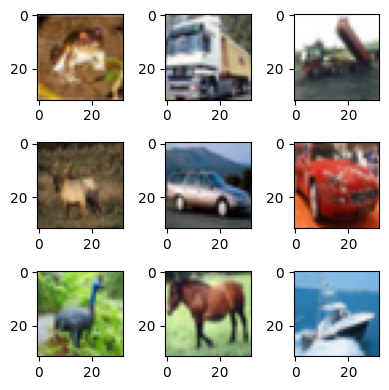

In [24]:
# 입력 이미지 시각화
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
#    plt.axis('off')
plt.tight_layout()
plt.show()

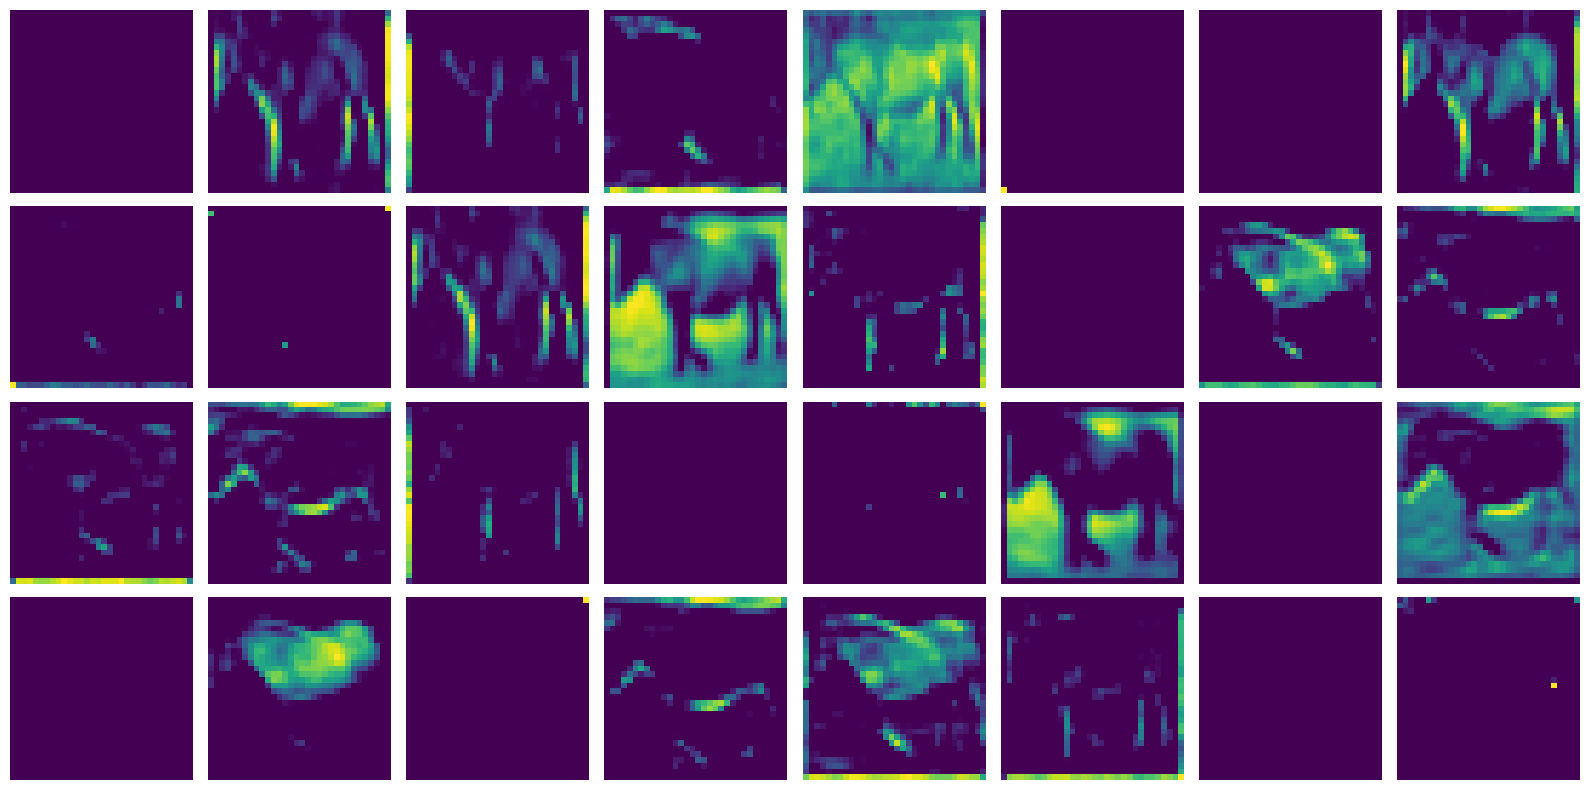

In [25]:
# 각 층에서 출력된 특징 추출
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])
features = extractor(np.expand_dims(X_train[7], 0))

# 첫 번째 합성곱 층의 특징 맵 32개 시각화
l0_features = features[0].numpy()[0]

plt.figure(figsize=(16, 8))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(l0_features[..., i])
    plt.axis('off')
plt.tight_layout()
plt.show()

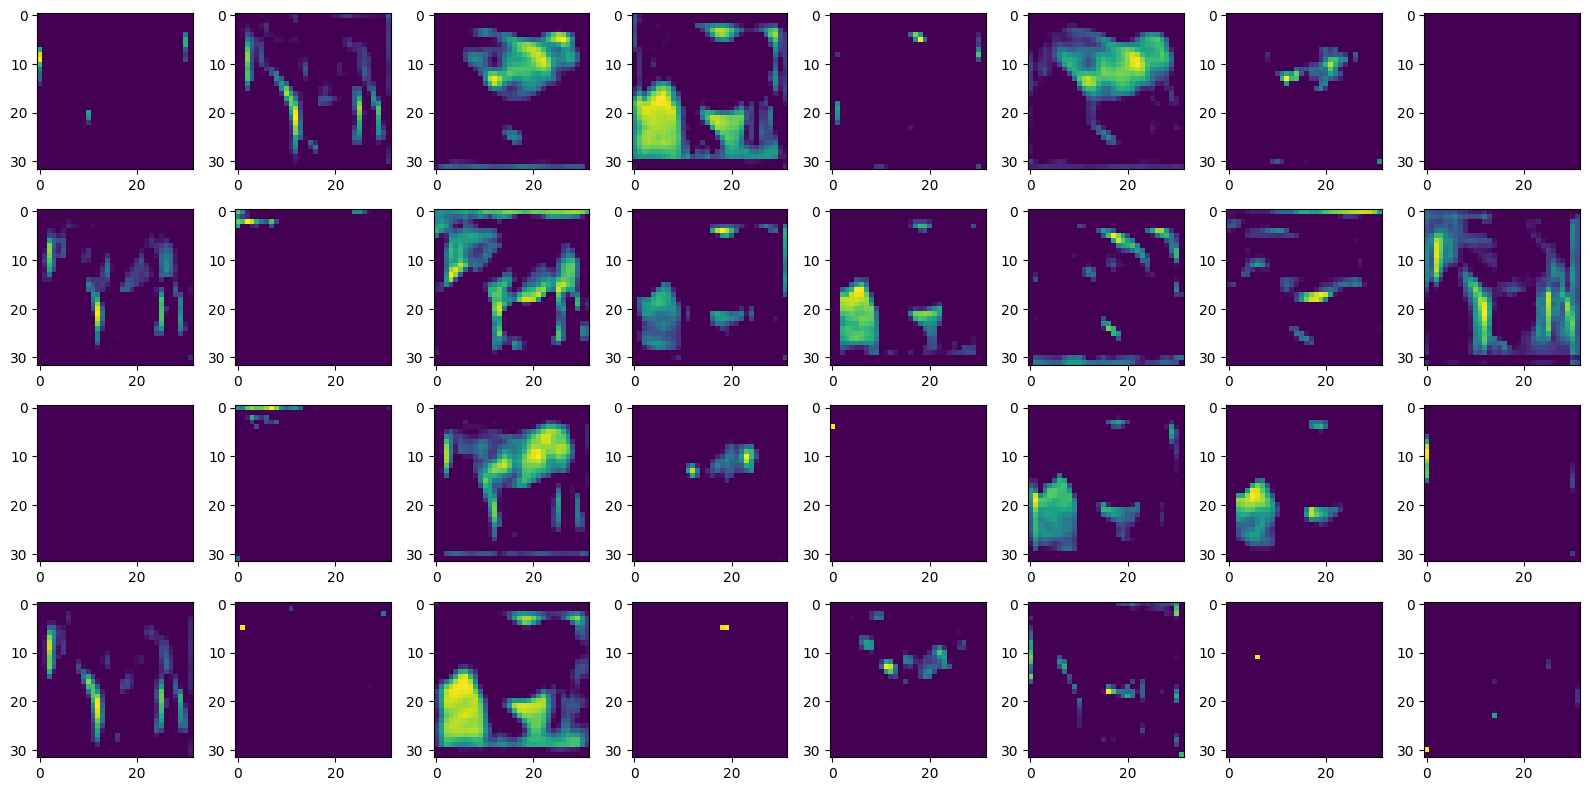

In [26]:
# 두번째 층의 특징 맵 32개 시각화
l2_features = features[2].numpy()[0]
plt.figure(figsize=(16, 8))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(l2_features[..., i])
#    plt.axis('off')
plt.tight_layout()
plt.show()

In [48]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6047 - loss: 1.1109 - val_accuracy: 0.6324 - val_loss: 1.0399
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6521 - loss: 0.9755 - val_accuracy: 0.6503 - val_loss: 0.9898
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6966 - loss: 0.8584 - val_accuracy: 0.6663 - val_loss: 0.9512
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7294 - loss: 0.7619 - val_accuracy: 0.6624 - val_loss: 0.9768
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7578 - loss: 0.6884 - val_accuracy: 0.6635 - val_loss: 1.0009
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7837 - loss: 0.6144 - val_accuracy: 0.6793 - val_loss: 0.9379
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.8033 - loss: 0.5544 - val_accuracy: 0.6711 - val_loss: 1.0253
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.8244 -

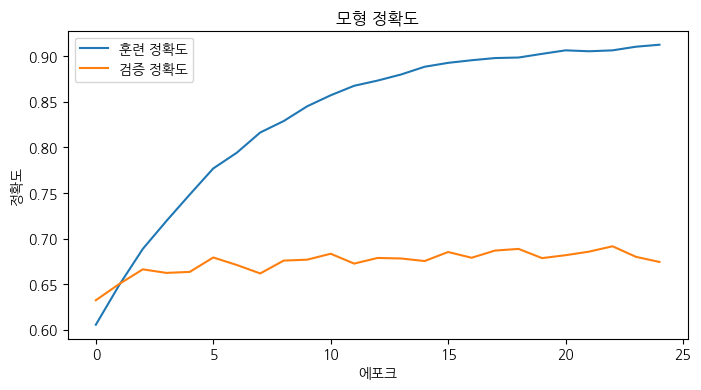

In [53]:
# Korean Fonts
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)
plt.figure(figsize=(8, 4))

# 정확도 시각화
plt.plot(history.history['accuracy'], label='훈련 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.title('모형 정확도')
plt.legend()
plt.show()

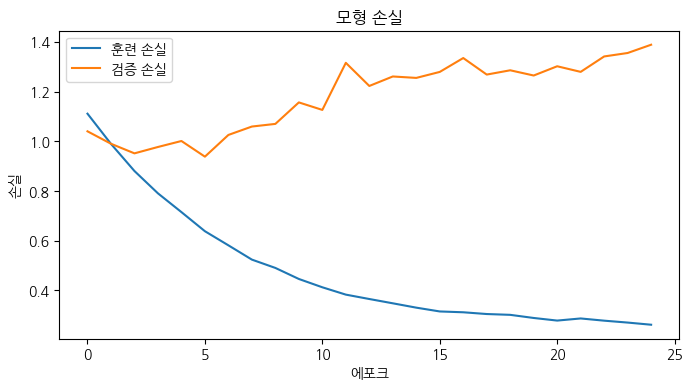

In [56]:
# 손실 시각화
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.title('모형 손실')
plt.legend()
plt.show()

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# 증강된 데이터로 학습
augmented_history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                              epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.5557 - loss: 1.3623 - val_accuracy: 0.6652 - val_loss: 0.9967
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.5894 - loss: 1.1867 - val_accuracy: 0.6784 - val_loss: 0.9746
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6075 - loss: 1.1197 - val_accuracy: 0.6923 - val_loss: 0.9208
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6212 - loss: 1.0839 - val_accuracy: 0.6982 - val_loss: 0.9055
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6363 - loss: 1.0470 - val_accuracy: 0.6797 - val_loss: 0.9831
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6410 - loss: 1.0427 - val_accuracy: 0.7124 - val_loss: 0.8637
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6460 - loss: 1.0252 - val_accuracy: 0.7204 - val_loss: 0.8360
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6482 - loss: 1.0063 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


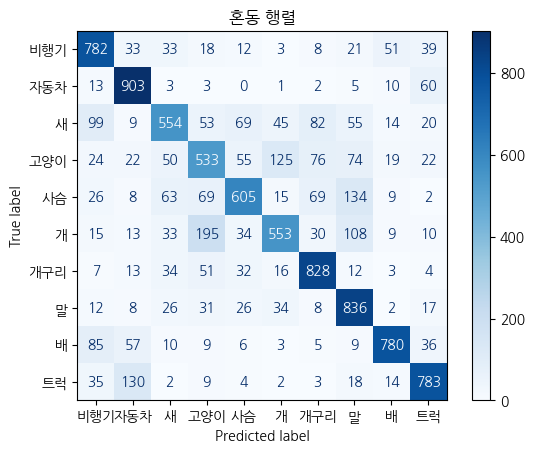

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# 예측 레이블 생성
pred_labels = np.argmax(model.predict(X_test), axis=1)
true_labels = np.argmax(y_test, axis=1)

# 혼동 행렬 생성
cm = confusion_matrix(true_labels, pred_labels)
ConfusionMatrixDisplay(cm, display_labels=["비행기", "자동차", "새", "고양이", "사슴", "개", "개구리", "말", "배", "트럭"]).plot(cmap='Blues')
plt.title('혼동 행렬')
plt.show()

### 자. 모형의 심화

In [ ]:
# Large CNN model for the CIFAR-10 Dataset
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
epochs=epochs, batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


### 9. 감정판별: 영화 리뷰 평가

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding
import matplotlib.pyplot as plt
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)


In [2]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

# Summarize number of classes
print("Classes: ")
print(np.unique(y))


Training data: 
(50000,)
(50000,)
Classes: 
[0 1]


In [3]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


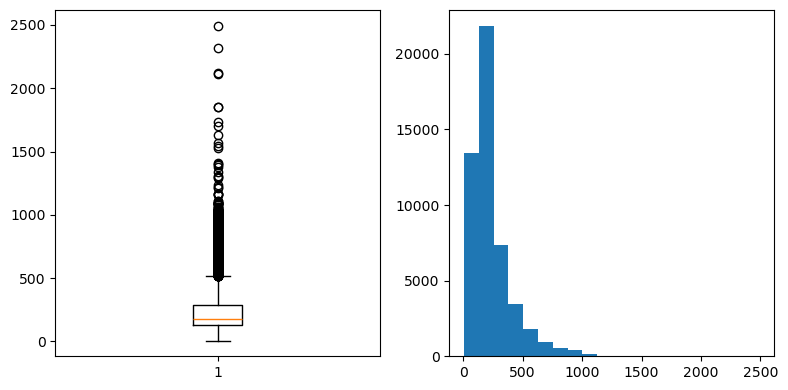

In [4]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

# plot review length
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result, bins=20)
plt.tight_layout()
plt.show()

In [14]:
imdb.load_data(num_words=5000)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
Embedding(5000, 32, input_length=500)


<Embedding name=embedding, built=False>

### 라. 모형 비교 및 최적화

#### 1) MLP vs. CNN 성능 비교

In [9]:
# MLP for the IMDB problem
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
epochs=1, batch_size=128, verbose=1)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.6526 - loss: 0.5783 - val_accuracy: 0.8404 - val_loss: 0.3723
Accuracy: 84.04%


In [7]:
# CNN for the IMDB problem
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
epochs=1, batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

196/196 - 11s - 57ms/step - accuracy: 0.7679 - loss: 0.4423 - val_accuracy: 0.8867 - val_loss: 0.2722
Accuracy: 88.67%
